In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Forest_Fire.xlsx',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [ ]:
df.shape

(247, 14)

In [ ]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.loc[[122]]

122    day
Name: day, dtype: object

In [ ]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [ ]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=0

In [ ]:
df=df.drop(122).reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    object 
 4   RH           243 non-null    object 
 5   Ws           243 non-null    object 
 6   Rain         243 non-null    object 
 7   FFMC         243 non-null    object 
 8   DMC          243 non-null    object 
 9   DC           243 non-null    object 
 10  ISI          243 non-null    object 
 11  BUI          243 non-null    object 
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.6+ KB


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df=df.drop(['day', 'month', 'year'],axis=1)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1.0
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1.0
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1.0
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1.0


In [ ]:
df[['Temperature', 'RH', 'Ws']]=df[['Temperature', 'RH', 'Ws']].astype('int64')

In [ ]:
df['Region']=df['Region'].astype('int64')

In [ ]:
df.Classes.value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
df.Classes=np.where(df.Classes.str.contains('not fire'),0,1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [ ]:
obj_cols=[i for i in df.columns if df[i].dtype=='O']

In [ ]:
obj_cols

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [ ]:
df[obj_cols]=df[obj_cols].astype('float64')

In [ ]:
a=df.Classes.value_counts(normalize=True)*100
a


Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

In [ ]:
a*100

Classes
1    5637.860082
0    4362.139918
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x7979661d7700>,
 [Text(-0.21895639684834634, 1.0779879852202388, 'Fire'),
  Text(0.21895649777686463, -1.0779879647200568, 'No Fire')],
 [Text(-0.1194307619172798, 0.5879934464837665, '56.38%'),
  Text(0.11943081696919887, -0.587993435301849, '43.62%')])

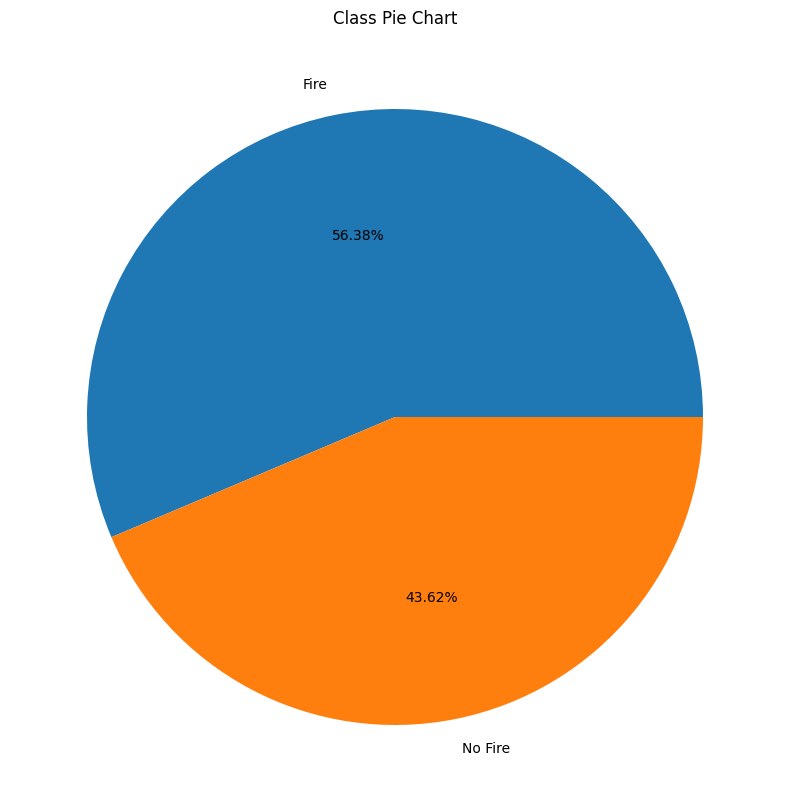

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Class Pie Chart')
labels=['Fire','No Fire']
plt.pie(a,labels=labels,autopct='%.2f%%')

<ipython-input-33-5edbdf4a554a>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


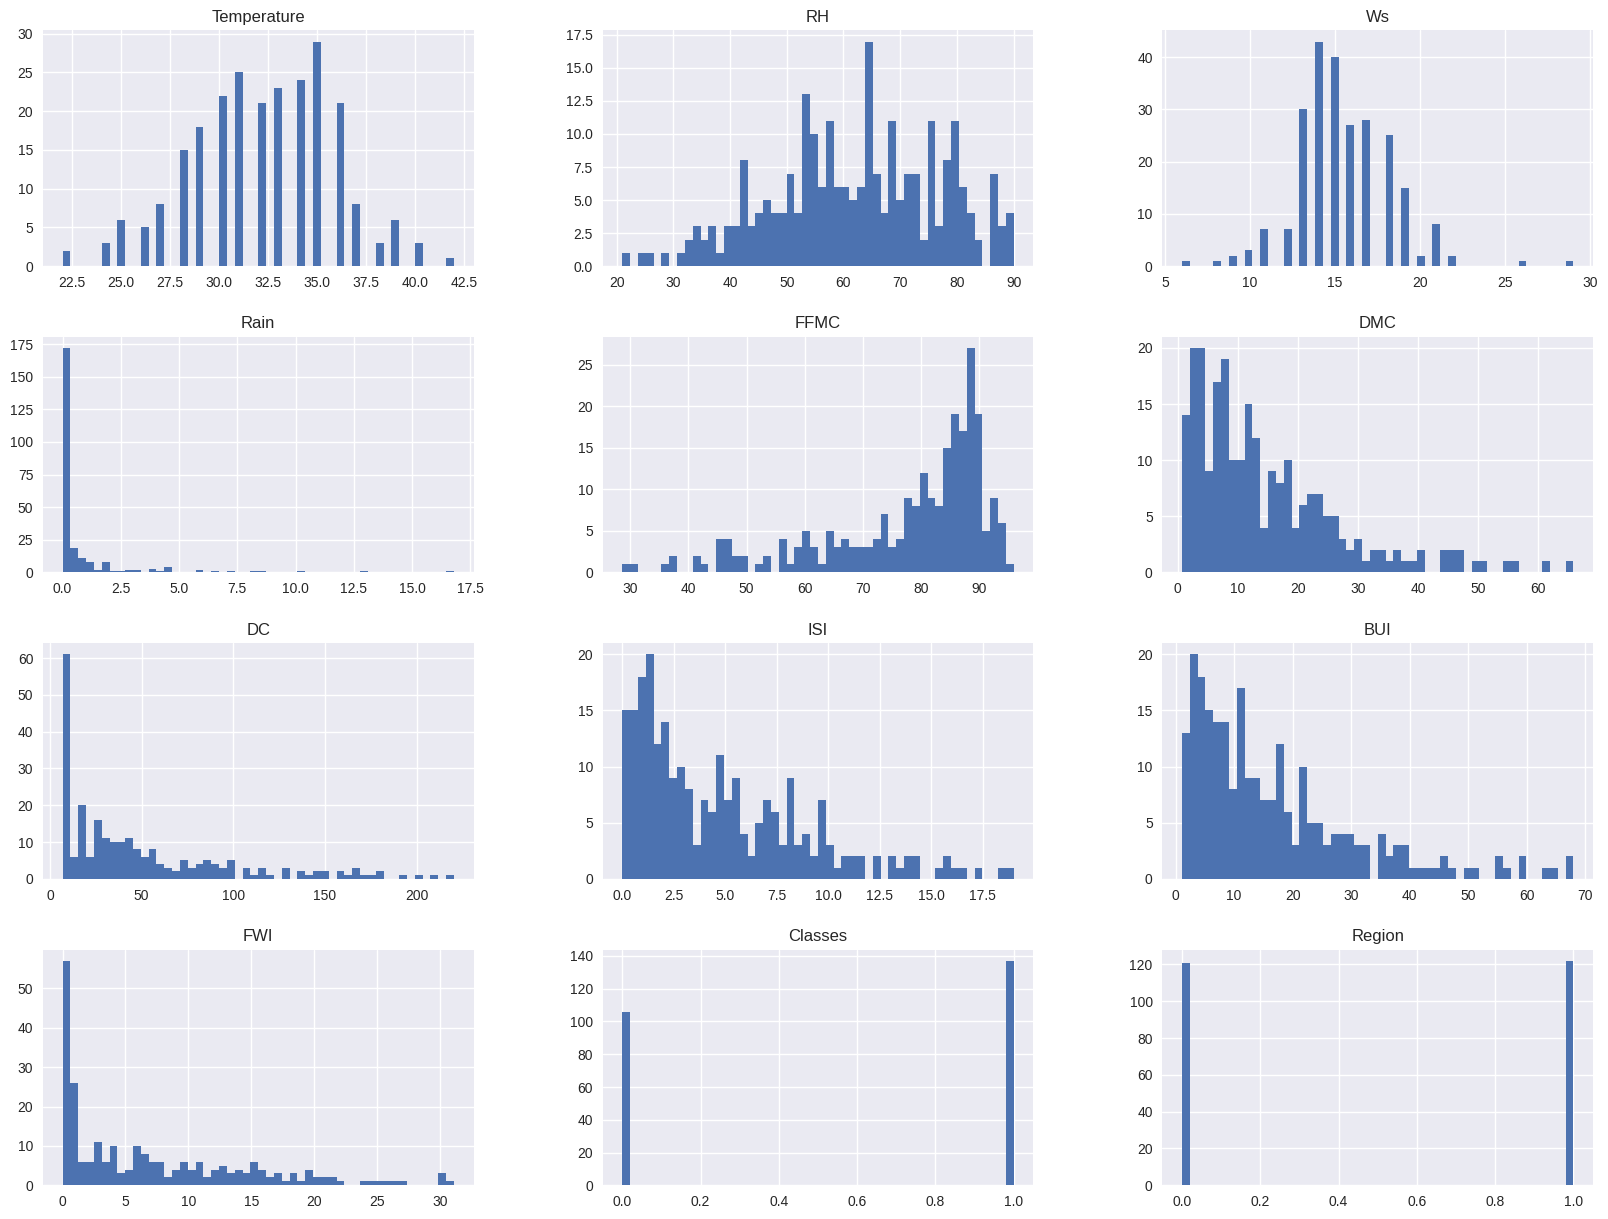

In [ ]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

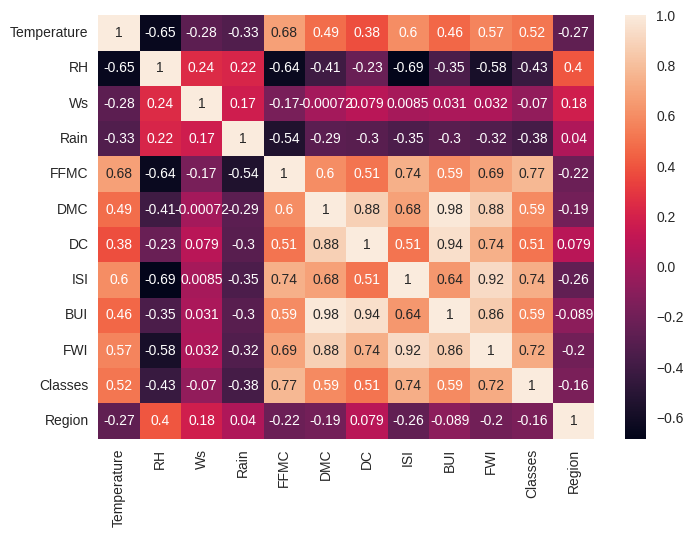

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='FWI'>

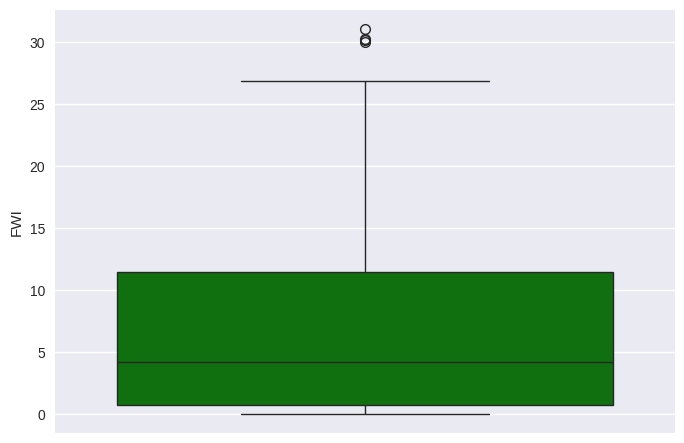

In [ ]:
sns.boxplot(df.FWI,color='green')

In [ ]:
corr=df.corr()
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,-0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,-0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,-0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,-0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,-0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,-0.197102


In [ ]:
corr.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
X=df.drop('FWI',axis=1)
y=df['FWI']
X.shape,y.shape


((243, 11), (243,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [ ]:
high_corr=set()
def columns_removal(df,threshold):
  for i in range(len(df.columns)):
    for j in range (i):
      if abs(df.iloc[i][j])>threshold:
        col=df.columns[i]
        high_corr.add(col)
  return high_corr

In [ ]:
len(corr.columns)

11

In [ ]:
corr=X_train.corr()

In [ ]:

col=columns_removal(corr,.85)
col

{'BUI', 'DC'}

In [ ]:
X_train=X_train.drop(['BUI', 'DC'],axis=1)
X_test=X_test.drop(['BUI', 'DC'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
X_train_scaled=s.fit_transform(X_train)
X_test_scaled=s.transform(X_test)

<ipython-input-77-0504cc985c48>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Axes: >

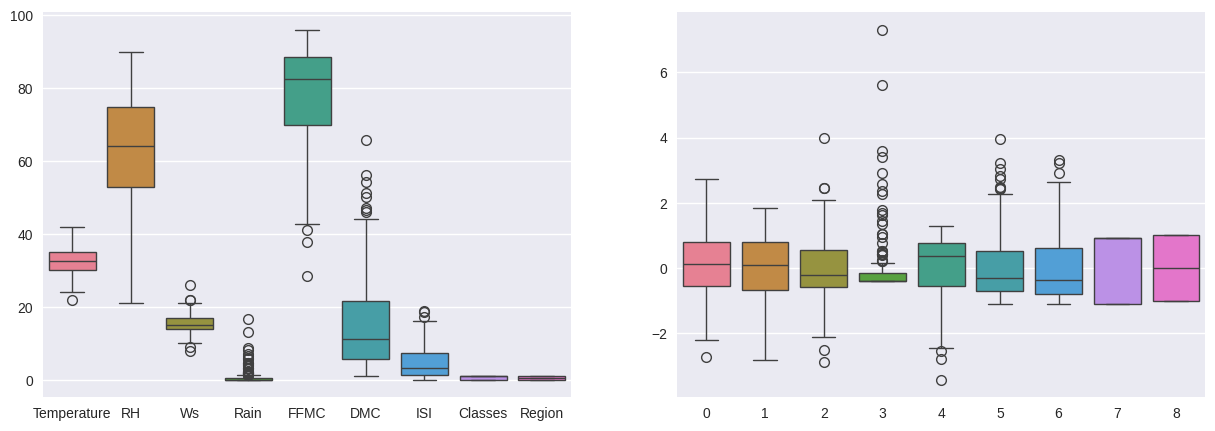

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled,y_train)
y_pred_test=regressor.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print('mae ',mae,' score',score)

mae  0.5648036371485076  score 0.9847206874554418


In [ ]:
from sklearn.linear_model import Lasso
regressor=Lasso()
regressor.fit(X_train_scaled,y_train)
y_pred_test=regressor.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print('mae ',mae,' score',score)

mae  1.1203368882393199  score 0.9511364350928344


In [ ]:
from sklearn.linear_model import Ridge
Ridgeregressor=Ridge()
regressor.fit(X_train_scaled,y_train)
y_pred_test=regressor.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print('mae ',mae,' score',score)

mae  1.8554687479717549  score 0.8804077479376988


In [ ]:
from sklearn.linear_model import ElasticNet
regressor=ElasticNet()
regressor.fit(X_train_scaled,y_train)
y_pred_test=regressor.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,r2_score
mae=mean_absolute_error(y_test,y_pred_test)
score=r2_score(y_test,y_pred_test)
print('mae ',mae,' score',score)

mae  1.8554687479717549  score 0.8804077479376988


In [ ]:
import pickle
pickle.dump(Ridgeregressor,open('ridge.pkl','wb'))
pickle.dump(s,open('scaler.pkl','wb'))

In [ ]:
df['Classes']=df['Classes'].astype('O')